In [609]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.sparse import diags
from tqdm import tqdm
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

os.getcwd()

'/Users/jonnycodd/Documents/MASTERS/Networks/RecommendationSystems_NetworksFP/code'

# Load data

In [610]:
# Load bi-partide network
bi_partide_network =  pd.read_csv("../output/collbarfilter.csv")

bi_partide_network.drop(bi_partide_network.columns[0], axis=1, inplace=True)
bi_partide_network.reset_index(drop=True, inplace=True)
bi_partide_network[bi_partide_network.notna()] += 2.5 # Make all values positive
bi_partide_network = bi_partide_network.fillna(0)
bi_partide_network_sparse = csr_matrix(bi_partide_network)
bi_partide_network

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [611]:
# Create binary matrix 
binary_network = bi_partide_network.copy()
binary_network.iloc[:, 1:] = (binary_network.iloc[:, 1:] > 0).astype(int)
#binary_network = binary_network.fillna(0)

# Convert to sparse matrix
binary_network_sparse = csr_matrix(binary_network.values)

binary_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algorithms

## With ratings

In [635]:
def probabilistic_spreading_with_ratings(user_item_matrix, user_index, K=9719):
    
    # Create vector of the movies the individual has seen and their ratings
    seen_movies = user_item_matrix[user_index, :]
    ratings = bi_partide_network_sparse[user_index, :]

    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_matrix.sum(axis=0)
    user_degree = user_item_matrix.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by their ratings and inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(ratings.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_matrix.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_matrix.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]

    return top_k_weights, top_k_indices, final_movie_weights_dense


In [613]:
weights, indices, _ = probabilistic_spreading_with_ratings(binary_network_sparse, 0, 10)

## Binary

In [614]:
def probabilistic_spreading_binary(user_item_sparse, user_index, K = 9719):
    
    # Create vector of the movies the individual has seen
    seen_movies = user_item_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()

    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]

    # Select the K highest weights
    top_k_weights = final_movie_weights_dense[top_k_indices]
    

    return top_k_weights,  top_k_indices, final_movie_weights_dense



In [615]:
weights, indices, _ = probabilistic_spreading_binary(binary_network_sparse, 0, 10)

In [616]:
weights

array([0.65101011, 0.55851196, 0.45469533, 0.44257122, 0.43470222,
       0.4281437 , 0.41608424, 0.41454562, 0.41378308, 0.3866272 ])

# Heat s

In [618]:
def heatS(sparse_array, user_index, k = 9719):
    # Convert sparse matrix to dense array for processing
    array = sparse_array.toarray()
    n_rows, n_cols = array.shape
    
    # Step 1: Find indices of zeros in the specified user's row and set corresponding columns to zero
    zero_indices = np.where(array[user_index] == 0)[0]
    resource_allocation = array.copy()
    resource_allocation[:, zero_indices] = 0
    
    # Step 2: Calculate movie_to_user without a loop
    sum_resource_allocation = resource_allocation.sum(axis=1)
    sum_array = array.sum(axis=1)
    movie_to_user = np.divide(sum_resource_allocation, sum_array, where=sum_array!=0)
    
    # Step 3: User to movie ratio
    weighted_sums = (movie_to_user[:, None] * array).sum(axis=0)
    column_sums = array.sum(axis=0)
    user_to_movie = np.divide(weighted_sums, column_sums, where=column_sums!=0)
    
    # Step 4: Zero out movies seen by the specified user
    one_indices = np.where(array[user_index] == 1)[0]
    user_to_movie[one_indices] = 0
    
    # Step 5: Find top K weights and indices
    if k > len(user_to_movie):
        k = len(user_to_movie)
    top_k_indices = np.argsort(user_to_movie)[-k:][::-1]
    top_k_weights = user_to_movie[top_k_indices]
    
    return top_k_weights, top_k_indices, user_to_movie


In [652]:
bi_partide_network_array = np.array(bi_partide_network)

def heatS_with_ratings(sparse_array, user_index, k = 9719):
    # Convert sparse matrix to dense array for processing
    array = sparse_array.toarray()
    n_rows, n_cols = array.shape
    
    # Step 1: Find indices of zeros in the specified user's row and set corresponding columns to zero
    zero_indices = np.where(array[user_index] == 0)[0]
    resource_allocation = bi_partide_network_array.copy()
    resource_allocation[:] = bi_partide_network_array[user_index]
    resource_allocation[:, zero_indices] = 0
    
    # Step 2: Calculate movie_to_user without a loop
    sum_resource_allocation = resource_allocation.sum(axis=1)
    sum_array = array.sum(axis=1)
    movie_to_user = np.divide(sum_resource_allocation, sum_array, where=sum_array!=0)
    
    # Step 3: User to movie ratio
    weighted_sums = (movie_to_user[:, None] * array).sum(axis=0)
    column_sums = array.sum(axis=0)
    user_to_movie = np.divide(weighted_sums, column_sums, where=column_sums!=0)
    
    # Step 4: Zero out movies seen by the specified user
    one_indices = np.where(array[user_index] == 1)[0]
    user_to_movie[one_indices] = 0
    
    # Step 5: Find top K weights and indices
    if k > len(user_to_movie):
        k = len(user_to_movie)
    top_k_indices = np.argsort(user_to_movie)[-k:][::-1]
    top_k_weights = user_to_movie[top_k_indices]
    
    return top_k_weights, top_k_indices, user_to_movie


# Evaluate recommendations over time

In [620]:
# Define a function to plot the movie degree after different iterations
def movie_degree_rank_plot(movie_degrees, num_iterations):
    sorted_indices = np.argsort(movie_degrees)[::-1]
    sorted_degrees = movie_degrees[sorted_indices]
    ranks = np.arange(1, len(movie_degrees) + 1)

    # Plotting degree rank plot
    plt.plot(ranks, sorted_degrees, marker='o', linestyle='-', color='b')
    plt.title(f'Degree Rank Plot after {num_iterations} iterations')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.savefig(f'../figures/Prob S movie rank plot - {num_iterations} iterations')
    plt.show()


In [621]:
# Define a function to plot the movie degree after the algorithm has run
def plot_recomendation_counts(reccomendation_counts, num_iterations):
    
    # Example column labels from the bipartite network (replace it with your actual data)
    column_labels = bi_partide_network.columns

    # Get indices of nonzero movie degree values
    nonzero_indices = np.where(reccomendation_counts != 0)[0]

    # Filtered movie degree array and corresponding labels
    filtered_movie_degree = reccomendation_counts[nonzero_indices]
    filtered_column_labels = [column_labels[i] for i in nonzero_indices]

    # Sort filtered movie degree array and corresponding labels
    sorted_indices = np.argsort(filtered_movie_degree)[::-1]
    sorted_filtered_movie_degree = filtered_movie_degree[sorted_indices][:500]
    sorted_filtered_column_labels = [filtered_column_labels[i] for i in sorted_indices][:500]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_filtered_movie_degree)), sorted_filtered_movie_degree)
    # Removed xticks setting for labels
    plt.title(f'Recommendations count after {num_iterations} iterations')
    plt.ylabel('Recommendation Count')
    plt.xlabel('Rank')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(f'../figures/Prob S movie recommendations - {num_iterations} iterations')
    plt.show()

In [622]:
# Plot evoloution of reccomended movies over time
def temporal_recommendations(binary_network_sparse, iterations, plot_points = [], algorithm = probabilistic_spreading_binary):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in range(binary_network_sparse.shape[0]):
            # Get index of top recommended film
            _, index,  _  = algorithm(binary_network_sparse, i, 1)
            recommendations.append((i, index[0]))
            reccomendation_counts[index[0]] += 1

        # Update matrix 
        row_indices, col_indices = zip(*recommendations)
        binary_network_sparse[row_indices, col_indices] = 1

        # Update movie degrees
        updated_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
        movie_degrees += updated_degrees - movie_degrees

        # Store degree information at plot_points iterations
        if j in plot_points:
            movie_degree_rank_plot(movie_degrees, j)
            plot_recomendation_counts(reccomendation_counts, j)


    return binary_network_sparse, movie_degrees, reccomendation_counts

In [623]:
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [10, 100], probabilistic_spreading_binary)

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Progress:   3%|▎         | 3/100 [00:05<02:58,  1.84s/it]


KeyboardInterrupt: 

Progress:   0%|          | 0/100 [00:00<?, ?it/s]/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


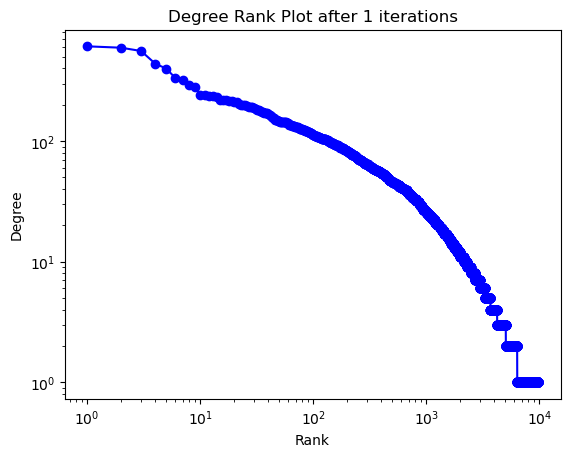

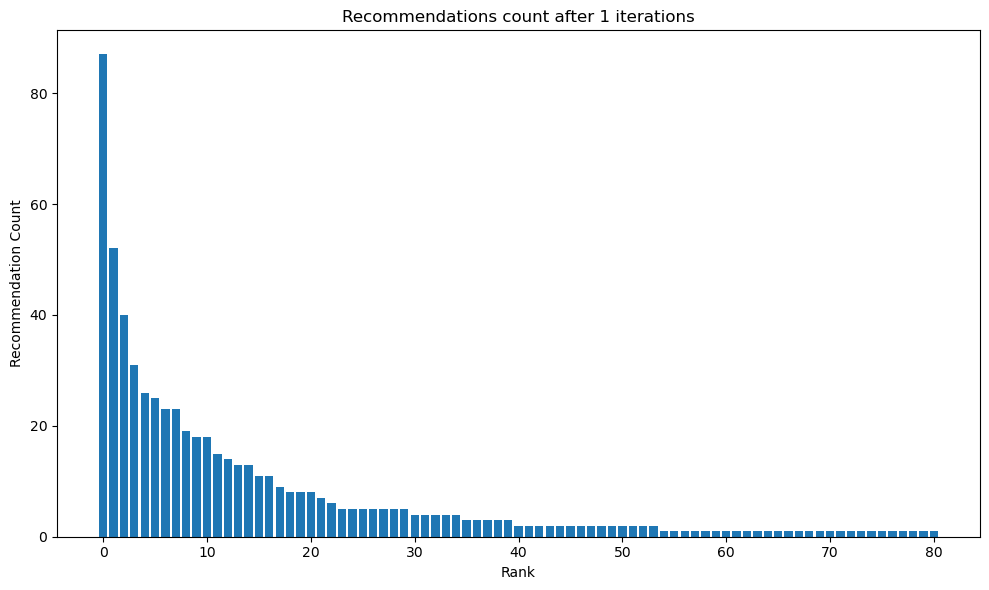

Progress:   9%|▉         | 9/100 [02:21<23:12, 15.30s/it]

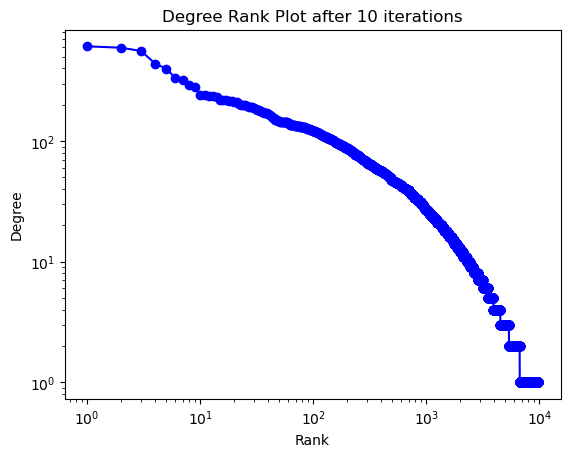

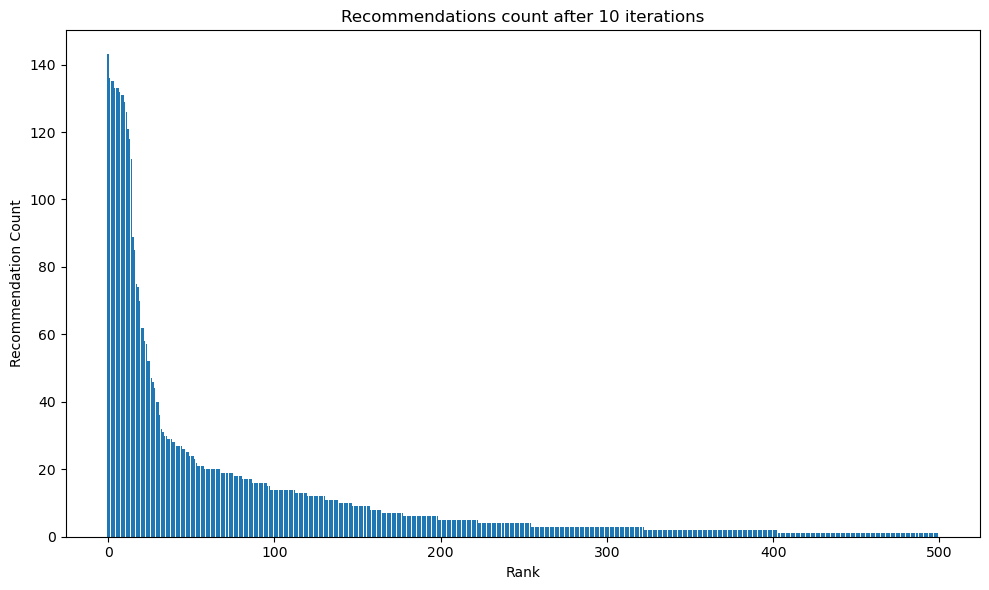

Progress:  99%|█████████▉| 99/100 [38:35<00:24, 24.28s/it]

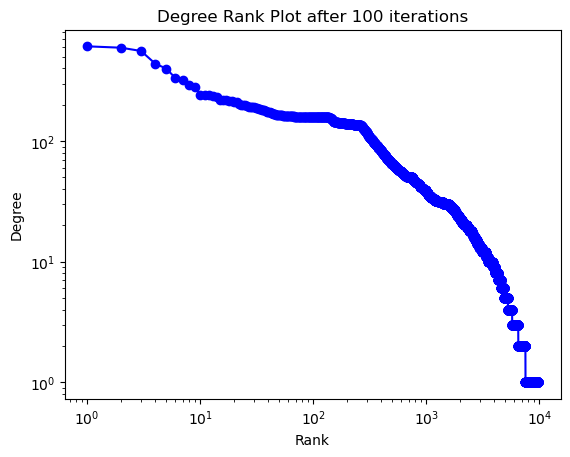

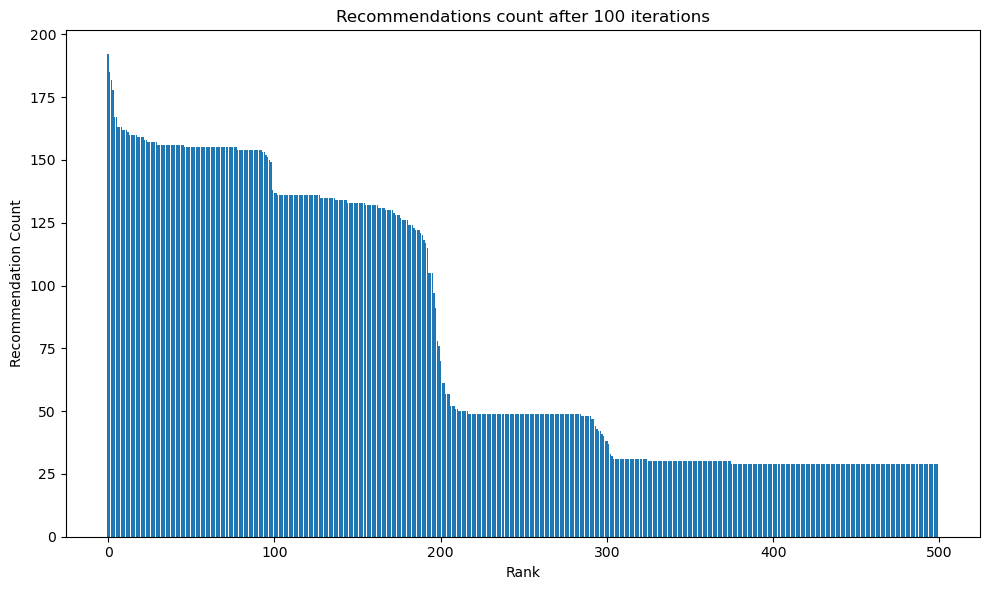

Progress: 100%|██████████| 100/100 [39:02<00:00, 23.42s/it]


In [624]:
# Heat S
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 100, [1, 10, 100], heatS)

# Out of sample performance

In [ ]:
def train_test_split(df, perc):
    # Ensure `perc` is between 0 and 1
    perc = max(min(perc, 1), 0)

    train = df.copy()
    
    # Create the DataFrame for removed ratings with the same structure as `df`
    removed_ratings_df = pd.DataFrame(index=train.index, columns=train.columns)
    
    # Iterate over each user in the DataFrame
    for user in tqdm(train.index, desc = "Train-test split user: "):
        # Get indices of the non-NaN ratings for the user
        user_ratings = train.loc[user]
        non_nan_indices = user_ratings[user_ratings != 0].index
        
        # Calculate the number of ratings to remove for the user
        num_to_remove = int(len(non_nan_indices) * perc)
        
        # Randomly select indices (movies) to remove
        indices_to_remove = np.random.choice(non_nan_indices, size=num_to_remove, replace=False)
        
        # Set the selected ratings to NaN in `df` and move them to `removed_ratings_df`
        for movie in indices_to_remove:
            removed_ratings_df.at[user, movie] = train.at[user, movie]
            train.at[user, movie] = np.nan
    
    # Optionally, you can fill NaN values with 0 or another value in both DataFrames
    train.fillna(0, inplace=True)
    removed_ratings_df.fillna(0, inplace=True)
    
    return train, removed_ratings_df

First we create a data frame where a cell = 1 if the movie has above average rating for the user and 0 otherwise.

In [658]:
bi_partide_network_pos_neg = pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_pos_neg.drop(bi_partide_network_pos_neg.columns[0], axis=1, inplace=True)
bi_partide_network_pos_neg.reset_index(drop=True, inplace=True)

# Calculate the mean of each row, ignoring NaNs
row_means = bi_partide_network_pos_neg.mean(axis=1, skipna=True)

# Copy the original DataFrame to maintain its structure and NaN values
pos_neg_network_df = bi_partide_network_pos_neg.copy()

# Iterate over each element and set to 1 if above row mean, else 0, maintaining NaNs
for i, row in pos_neg_network_df.iterrows():
    pos_neg_network_df.loc[i] = row.where(row.isna(), np.where(row > row_means[i], 1, 0))

pos_neg_network_df


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Binary algorithm network

In [628]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []
indices_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, indices, weights = probabilistic_spreading_binary(train_sparse, user_id)
    weights_list.append(weights)
    indices_list.append(indices)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/3546942668.py:11: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 349.72it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.002971,0.002815,0.002481,0.002666,0.002666,0.001313,0.038623,0.001828,0.042123,0.022072,...,0.001447,0.006997,0.004345,0.001565,0.000000,0.048265,0.032128,0.005519,0.000000,0.005777
1,0.000760,0.000308,0.000000,0.000000,0.000000,0.000309,0.001930,0.000025,0.014044,0.000823,...,0.000236,0.001004,0.001448,0.000122,0.000668,0.002571,0.004275,0.001777,0.005035,0.000000
2,0.000438,0.000275,0.005642,0.000000,0.000000,0.000142,0.011340,0.000193,0.007021,0.001014,...,0.000737,0.001537,0.000957,0.000399,0.000000,0.005591,0.004266,0.003278,0.006964,0.000934
3,0.003518,0.001584,0.000836,0.002361,0.002361,0.000492,0.021542,0.002641,0.036461,0.012998,...,0.000816,0.003744,0.001836,0.000604,0.000112,0.050681,0.021308,0.003266,0.048455,0.000942
4,0.000294,0.000196,0.000356,0.000146,0.000146,0.000083,0.002962,0.000286,0.005442,0.001896,...,0.000106,0.001048,0.000323,0.000121,0.000000,0.005420,0.004023,0.000756,0.006607,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.018759,0.008208,0.005454,0.019490,0.019490,0.004162,0.097274,0.018736,0.214157,0.051651,...,0.005719,0.031912,0.014026,0.003775,0.001013,0.158602,0.139287,0.030944,0.201694,0.012687
606,0.003212,0.001450,0.000723,0.002880,0.002880,0.000987,0.028265,0.001596,0.032233,0.022110,...,0.000847,0.008578,0.003404,0.001381,0.000000,0.039007,0.029816,0.006988,0.057993,0.005157
607,0.026139,0.006284,0.003883,0.003474,0.003474,0.005210,0.112931,0.005516,0.176654,0.056894,...,0.006049,0.044969,0.023681,0.009281,0.000468,0.000000,0.000000,0.043333,0.206128,0.005820
608,0.000128,0.000218,0.000054,0.000000,0.000000,0.000078,0.002585,0.000166,0.003697,0.002147,...,0.000062,0.000799,0.000516,0.000064,0.000000,0.003947,0.003046,0.000709,0.004407,0.000186


In [629]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.57341516771259


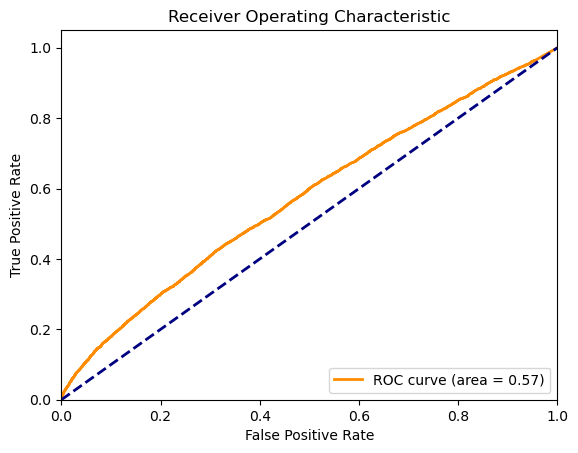

In [630]:
# Compute FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [631]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.621160892197405


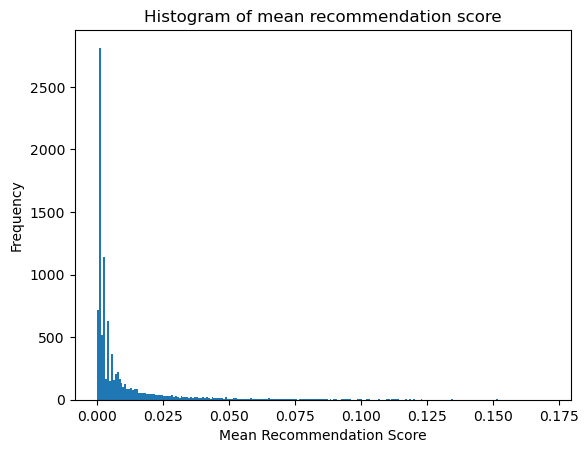

In [632]:
# Plot histogram of mean weights
column_means = weights_df.mean()

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of mean recommendation score')
plt.xlabel('Mean Recommendation Score')
plt.ylabel('Frequency')
plt.show() 

# Heat S

In [662]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []
indices_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, indices, weights = heatS(train_sparse, user_id, )
    weights_list.append(weights)
    indices_list.append(indices)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)

Computing metrics: 100%|██████████| 610/610 [00:16<00:00, 37.36it/s]


In [663]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5101152609283641


In [664]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.5450403394427771


# Heat S with ratinngs

In [659]:
# Train test split of binary network
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []
indices_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, indices, weights = heatS_with_ratings(train_sparse, user_id, )
    weights_list.append(weights)
    indices_list.append(indices)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics: 100%|██████████| 610/610 [00:32<00:00, 18.64it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.774904,3.780374,3.780374,16.18,11.460833,2.278873,7.600982,0.479834,7.164838,8.957854,...,0.542225,6.249961,2.709614,0.802324,7.490741,4.981270,3.888316,2.012011,0.000000,6.037313
1,0.089559,0.436916,0.436916,1.87,1.324583,0.263380,0.878482,0.055457,0.828075,1.035302,...,0.062668,0.722338,0.313163,0.092728,0.865741,0.575709,0.449391,0.232538,0.429458,0.697761
2,0.076628,0.373832,0.373832,1.60,1.133333,0.225352,0.751642,0.047450,0.708513,0.885820,...,0.053619,0.618043,0.267947,0.079340,0.740741,0.492585,0.384506,0.198963,0.367451,0.597015
3,0.583333,2.845794,2.845794,12.18,8.627500,1.715493,5.721877,0.361210,5.393556,6.743304,...,0.408177,4.704853,2.039746,0.603974,5.638889,3.749806,2.927051,1.514604,2.797221,4.544776
4,0.123563,0.602804,0.602804,2.58,1.827500,0.363380,1.212023,0.076512,1.142477,1.428385,...,0.086461,0.996595,0.432064,0.127935,1.194444,0.794294,0.620016,0.320827,0.592515,0.962687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.124042,15.240654,15.240654,65.23,46.204583,9.187324,30.643515,1.934460,28.885192,36.113771,...,2.185992,25.196845,10.923863,3.234585,30.199074,20.082091,15.675825,8.111463,14.980518,24.339552
606,0.533525,2.602804,2.602804,11.14,7.890833,1.569014,5.233309,0.330368,4.933022,6.167521,...,0.373324,4.303125,1.865581,0.552403,5.157407,3.429626,2.677122,1.385278,2.558378,4.156716
607,1.986590,9.691589,9.691589,41.48,29.381667,5.842254,19.486326,1.230130,18.368201,22.964882,...,1.390080,16.022768,6.946525,2.056885,19.203704,12.770276,0.000000,5.158110,9.526167,15.477612
608,0.093870,0.457944,0.457944,1.96,1.388333,0.276056,0.920762,0.058126,0.867928,1.085129,...,0.065684,0.757103,0.328235,0.097191,0.907407,0.603417,0.471020,0.243729,0.450127,0.731343


In [660]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5351047088503413


In [661]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.5686750771139486


## Prob S with ratings

In [636]:
# Train test split 
train, test = train_test_split(binary_network, 0.2)

# Make sparse
train_sparse = csr_matrix(train.values)
test_sparse = csr_matrix(test.values)

# Output a dataframe of predicitions for each user
weights_list = []

for user_id in tqdm(range(test.shape[0]), desc="Computing metrics"):
    _, _, weights = probabilistic_spreading_with_ratings(train_sparse, user_id)
    weights_list.append(weights)

# Convert the list of arrays into a DataFrame
weights_df = pd.DataFrame(weights_list, columns=train.columns)
weights_df

Computing metrics:   0%|          | 0/610 [00:00<?, ?it/s]/var/folders/js/pnl2ymz143j6txn5bftwltm40000gn/T/ipykernel_6713/1533436618.py:13: RuntimeWarning: divide by zero encountered in divide
  movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
Computing metrics: 100%|██████████| 610/610 [00:01<00:00, 365.59it/s]


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.016830,0.030213,0.010141,0.024860,0.008003,0.224188,0.008458,0.283079,0.104960,...,0.0,0.065164,0.011757,0.0,0.000429,0.279460,0.179216,0.034540,0.000000,0.031847
1,0.0,0.001192,0.001192,0.000000,0.000000,0.001480,0.009007,0.000151,0.090515,0.004477,...,0.0,0.006452,0.005544,0.0,0.002776,0.017671,0.016688,0.007912,0.023823,0.000000
2,0.0,0.001454,0.028006,0.000303,0.000504,0.000449,0.034402,0.000206,0.012470,0.002836,...,0.0,0.006831,0.003102,0.0,0.000000,0.019963,0.012099,0.015847,0.020757,0.003877
3,0.0,0.007370,0.010009,0.006076,0.038765,0.001437,0.122979,0.014497,0.203991,0.072318,...,0.0,0.020499,0.007969,0.0,0.000574,0.206149,0.098809,0.016520,0.260213,0.012320
4,0.0,0.001152,0.002160,0.000448,0.001981,0.000444,0.020769,0.001022,0.031563,0.005417,...,0.0,0.007484,0.000869,0.0,0.000000,0.026767,0.020226,0.005560,0.028688,0.000748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.043692,0.102542,0.081213,0.194577,0.017456,0.586911,0.108865,1.301718,0.223742,...,0.0,0.183659,0.045495,0.0,0.006427,0.920713,0.668256,0.133251,0.956353,0.048565
606,0.0,0.007829,0.012639,0.018190,0.026496,0.003424,0.158412,0.006411,0.207936,0.093094,...,0.0,0.064955,0.011197,0.0,0.000257,0.174948,0.135901,0.032658,0.277138,0.019730
607,0.0,0.027384,0.049186,0.023630,0.043259,0.018152,0.492664,0.021575,0.958739,0.215798,...,0.0,0.241811,0.055350,0.0,0.001307,0.000000,0.000000,0.182216,0.765729,0.023527
608,0.0,0.000872,0.000872,0.000000,0.000128,0.000387,0.012505,0.000729,0.018782,0.006576,...,0.0,0.004221,0.001709,0.0,0.000000,0.019335,0.012061,0.002715,0.020250,0.000651


In [637]:
weights_df = weights_df.div(weights_df.max(axis=1), axis=0)
weights_df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.005674,0.010186,0.003419,0.008382,0.002698,0.075586,0.002852,0.095441,0.035387,...,0.0,0.021970,0.003964,0.0,0.000145,0.094221,0.060423,0.011645,0.000000,0.010737
1,0.0,0.002114,0.002114,0.000000,0.000000,0.002626,0.015980,0.000267,0.160580,0.007943,...,0.0,0.011447,0.009835,0.0,0.004924,0.031349,0.029606,0.014036,0.042263,0.000000
2,0.0,0.007164,0.137955,0.001493,0.002482,0.002210,0.169461,0.001017,0.061426,0.013971,...,0.0,0.033649,0.015280,0.0,0.000000,0.098335,0.059600,0.078060,0.102250,0.019097
3,0.0,0.003651,0.004958,0.003010,0.019205,0.000712,0.060927,0.007182,0.101061,0.035828,...,0.0,0.010156,0.003948,0.0,0.000284,0.102131,0.048952,0.008184,0.128915,0.006104
4,0.0,0.001127,0.002113,0.000438,0.001938,0.000434,0.020318,0.001000,0.030877,0.005299,...,0.0,0.007322,0.000850,0.0,0.000000,0.026185,0.019787,0.005439,0.028065,0.000732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.005112,0.011998,0.009502,0.022767,0.002042,0.068672,0.012738,0.152310,0.026179,...,0.0,0.021489,0.005323,0.0,0.000752,0.107730,0.078190,0.015591,0.111900,0.005682
606,0.0,0.003459,0.005584,0.008036,0.011706,0.001513,0.069987,0.002832,0.091867,0.041129,...,0.0,0.028697,0.004947,0.0,0.000114,0.077293,0.060042,0.014429,0.122441,0.008717
607,0.0,0.003875,0.006960,0.003344,0.006121,0.002568,0.069709,0.003053,0.135656,0.030534,...,0.0,0.034215,0.007832,0.0,0.000185,0.000000,0.000000,0.025782,0.108346,0.003329
608,0.0,0.001347,0.001347,0.000000,0.000198,0.000598,0.019321,0.001127,0.029020,0.010161,...,0.0,0.006521,0.002641,0.0,0.000000,0.029874,0.018636,0.004195,0.031288,0.001005


In [638]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = weights_df.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat == 1
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.5908377864282186


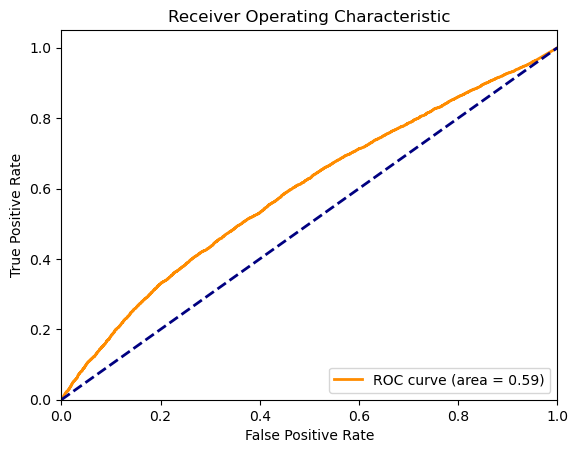

In [639]:
# Calculate the AUC
fpr, tpr, thresholds = roc_curve(filtered_pos_neg, filtered_weights)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [365]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.6246927779047552


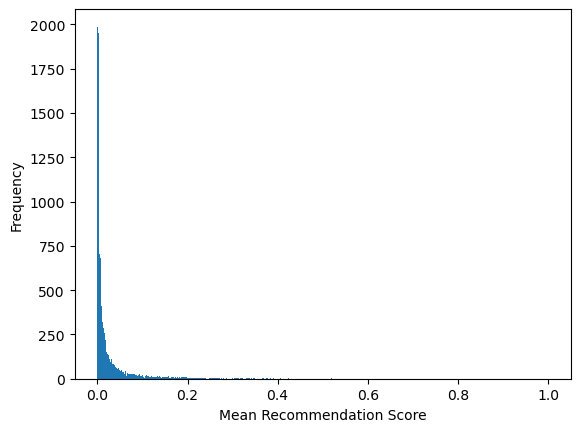

In [367]:
# Plot histogram of mean weights
column_means = weights_df.iloc[0]

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.xlabel('Mean Recommendation Score')
plt.ylabel('Frequency')
plt.show() 

## Recommending highest rated movies

In [368]:
bi_partide_network_highrated= pd.read_csv("../output/collbarfilter.csv")
bi_partide_network_highrated.drop(bi_partide_network_highrated.columns[0], axis=1, inplace=True)
bi_partide_network_highrated.reset_index(drop=True, inplace=True)

# make all positive
bi_partide_network_highrated += 2.5
bi_partide_network_highrated 

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
# Train test split 
train, test = train_test_split(bi_partide_network_highrated, 0.2)

Train-test split user:  68%|██████▊   | 415/610 [00:19<00:09, 20.91it/s]


KeyboardInterrupt: 

In [ ]:
train = train.replace(0, np.nan)

In [ ]:
column_means = train.mean()

# Replace each column with its mean
for column in train.columns:
    train[column] = column_means[column]

In [ ]:
train = train.replace(np.nan, 0)
train = train/5
train

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
1,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
2,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
3,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
4,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
606,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
607,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2
608,0.8,0.8,0.7,1.0,0.8,0.3,0.692308,0.6,0.731034,0.657143,...,0.3,0.75,0.733333,0.6,0.6,0.761111,0.563158,0.4,0.645,0.2


In [ ]:
# Convert test df to numpy
test_array = test.to_numpy()

# Convert pos/neg score df to numpy
pos_neg_array = pos_neg_network_df.to_numpy()

# Convert weights_df to numpy array
weights_array = train.to_numpy()

# Flatten arrays to 1D
test_flat = test_array.flatten()
pos_neg_flat = pos_neg_array.flatten()
weights_flat = weights_array.flatten()

# Filter to keep only the films held out in test
filter_mask = test_flat !=0
filtered_pos_neg = pos_neg_flat[filter_mask]
filtered_weights = weights_flat[filter_mask]

# Calculate AUC
auc_score = roc_auc_score(filtered_pos_neg, filtered_weights)

print(f"The AUC score is: {auc_score}")

The AUC score is: 0.6707542604674138


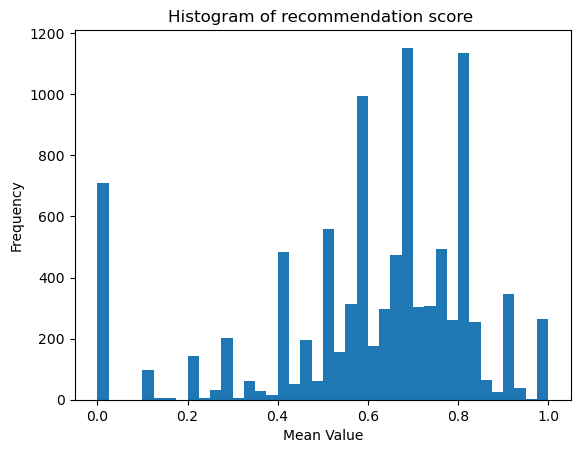

In [ ]:
# Plot histogram of mean weights
column_means = train.mean()

# Step 2: Plot a histogram of the column means
plt.hist(column_means, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of recommendation score ')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show() 

In [ ]:
average_precision = average_precision_score(filtered_pos_neg, filtered_weights)
print(f"Average Precision: {average_precision}")

Average Precision: 0.674957720180299
